In [142]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import random

In [2]:
monday = pd.read_csv('../projectdata/monday.csv', sep=';')
tuesday = pd.read_csv('../projectdata/tuesday.csv', sep=';')
wednesday = pd.read_csv('../projectdata/wednesday.csv', sep=';')
thursday = pd.read_csv('../projectdata/thursday.csv', sep=';')
friday = pd.read_csv('../projectdata/friday.csv', sep=';')

In [3]:
cust = monday['customer_no'].max(), tuesday['customer_no'].max(), wednesday['customer_no'].max(), thursday['customer_no'].max(), friday['customer_no'].max(),

In [4]:
cust

(1447, 1422, 1531, 1535, 1510)

In [5]:
tuesday['customer_no'] = tuesday['customer_no'] + cust[0]
wednesday['customer_no'] = wednesday['customer_no'] + cust [0] + cust[1]
thursday['customer_no'] = thursday['customer_no'] + cust [0] + cust[1] + cust[2]
friday['customer_no'] = friday['customer_no'] + cust [0] + cust[1] + cust[2] + cust[3]

In [6]:
week = monday.append(tuesday).append(wednesday).append(thursday).append(friday)
week

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
5120,2019-09-06 21:50:00,7435,dairy
5121,2019-09-06 21:50:00,7442,checkout
5122,2019-09-06 21:50:00,7443,checkout
5123,2019-09-06 21:50:00,7444,drinks


In [7]:
week.reset_index(inplace=True)

In [8]:
week.drop('index', axis=1, inplace=True)

In [9]:
week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24877 entries, 0 to 24876
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 583.2+ KB


In [10]:
week['timestamp'] = pd.to_datetime(week['timestamp'],infer_datetime_format=True)

In [11]:
week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24877 entries, 0 to 24876
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    24877 non-null  datetime64[ns]
 1   customer_no  24877 non-null  int64         
 2   location     24877 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 583.2+ KB


In [12]:
week['after'] = week.groupby(by=['customer_no'])['location'].shift(-1)

In [13]:
week['time_spent'] = week.groupby(by=['customer_no'])['timestamp'].shift(-1) - week.groupby(by=['customer_no'])['timestamp'].shift(0)

In [14]:
week

,timestamp,customer_no,location,after,time_spent
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00
1,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00
2,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00
3,2019-09-02 07:04:00,4,dairy,checkout,0 days 00:04:00
4,2019-09-02 07:04:00,5,spices,checkout,0 days 00:01:00
...,...,...,...,...,...
24872,2019-09-06 21:50:00,7435,dairy,NaN,NaT
24873,2019-09-06 21:50:00,7442,checkout,NaN,NaT
24874,2019-09-06 21:50:00,7443,checkout,NaN,NaT
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT


In [15]:
week['day'] = week['timestamp'].dt.day

In [16]:
week

,timestamp,customer_no,location,after,time_spent,day
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,2
1,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,2
2,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,2
3,2019-09-02 07:04:00,4,dairy,checkout,0 days 00:04:00,2
4,2019-09-02 07:04:00,5,spices,checkout,0 days 00:01:00,2
...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,7435,dairy,NaN,NaT,6
24873,2019-09-06 21:50:00,7442,checkout,NaN,NaT,6
24874,2019-09-06 21:50:00,7443,checkout,NaN,NaT,6
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT,6


In [17]:
week['day'].replace(to_replace=[2,3,4,5,6],value=['Monday','Tuesday','Wednesday','Thursday','Friday'],inplace=True)

In [18]:
week

,timestamp,customer_no,location,after,time_spent,day
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday
1,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,Monday
2,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,Monday
3,2019-09-02 07:04:00,4,dairy,checkout,0 days 00:04:00,Monday
4,2019-09-02 07:04:00,5,spices,checkout,0 days 00:01:00,Monday
...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,7435,dairy,NaN,NaT,Friday
24873,2019-09-06 21:50:00,7442,checkout,NaN,NaT,Friday
24874,2019-09-06 21:50:00,7443,checkout,NaN,NaT,Friday
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT,Friday


Total number of customers in each section

In [19]:
week.groupby('location').count()[['customer_no']]

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


Total number of customers in each section over time

In [20]:
p1 = week.groupby(['location','day']).count()[['customer_no']]
p1

customer_no
location day                   
checkout Friday            1502
         Monday            1437
         Thursday          1532
         Tuesday           1420
         Wednesday         1526
dairy    Friday             932
         Monday             895
         Thursday           965
         Tuesday            911
         Wednesday          976
drinks   Friday             844
         Monday             797
         Thursday           776
         Tuesday            713
         Wednesday          775
fruit    Friday            1057
         Monday            1005
         Thursday          1041
         Tuesday            976
         Wednesday         1043
spices   Friday             790
         Monday             750
         Thursday           790
         Tuesday            694
         Wednesday          730

In [21]:
p1.reset_index(inplace=True)
p1

,location,day,customer_no
0,checkout,Friday,1502
1,checkout,Monday,1437
2,checkout,Thursday,1532
3,checkout,Tuesday,1420
4,checkout,Wednesday,1526
5,dairy,Friday,932
6,dairy,Monday,895
7,dairy,Thursday,965
8,dairy,Tuesday,911
9,dairy,Wednesday,976


In [22]:
p1.set_index('day', inplace=True)

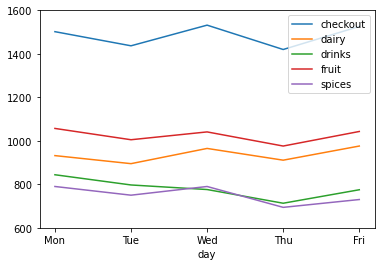

In [23]:
p1.groupby('location')['customer_no'].plot(legend=True)
plt.ylim(600,1600)
plt.xticks(ticks=[0,1,2,3,4], labels=['Mon','Tue','Wed','Thu','Fri']);

Customers at checkout over time

In [24]:
week.groupby(['location','day']).count().iloc[0:5,0:1]

timestamp
location day                 
checkout Friday          1502
         Monday          1437
         Thursday        1532
         Tuesday         1420
         Wednesday       1526

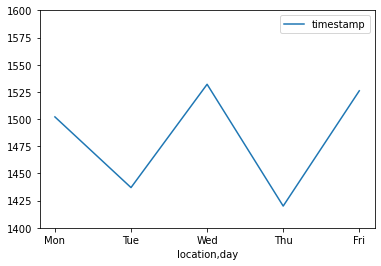

In [25]:
week.groupby(['location','day']).count().iloc[0:5,0:1].plot()
plt.ylim(1400,1600)
plt.xticks(ticks=[0,1,2,3,4], labels=['Mon','Tue','Wed','Thu','Fri']);

Time each customer spent in the market

In [26]:
week.head()

,timestamp,customer_no,location,after,time_spent,day
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday
1,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,Monday
2,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,Monday
3,2019-09-02 07:04:00,4,dairy,checkout,0 days 00:04:00,Monday
4,2019-09-02 07:04:00,5,spices,checkout,0 days 00:01:00,Monday


In [27]:
week[week['customer_no']==1]

,timestamp,customer_no,location,after,time_spent,day
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday
8,2019-09-02 07:05:00,1,checkout,NaN,NaT,Monday


In [28]:
week['timestamp'].dt.time.max()

datetime.time(21, 50)

In [29]:
week = week.sort_values(['customer_no','timestamp'])

In [30]:
week.reset_index(inplace=True)
week.drop('index', axis=1, inplace=True)
week

,timestamp,customer_no,location,after,time_spent,day
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday
1,2019-09-02 07:05:00,1,checkout,NaN,NaT,Monday
2,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,Monday
3,2019-09-02 07:06:00,2,checkout,NaN,NaT,Monday
4,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,Monday
...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,7442,checkout,NaN,NaT,Friday
24873,2019-09-06 21:48:00,7443,dairy,checkout,0 days 00:02:00,Friday
24874,2019-09-06 21:50:00,7443,checkout,NaN,NaT,Friday
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT,Friday


In [31]:
week['time_spent_total'] = week.groupby(by=['customer_no'])['timestamp'].transform(lambda x: x.max() -x.min())

In [32]:
week

,timestamp,customer_no,location,after,time_spent,day,time_spent_total
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00
1,2019-09-02 07:05:00,1,checkout,NaN,NaT,Monday,0 days 00:02:00
2,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,Monday,0 days 00:03:00
3,2019-09-02 07:06:00,2,checkout,NaN,NaT,Monday,0 days 00:03:00
4,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00
...,...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,7442,checkout,NaN,NaT,Friday,0 days 00:02:00
24873,2019-09-06 21:48:00,7443,dairy,checkout,0 days 00:02:00,Friday,0 days 00:02:00
24874,2019-09-06 21:50:00,7443,checkout,NaN,NaT,Friday,0 days 00:02:00
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT,Friday,0 days 00:00:00


In [33]:
week.reset_index(inplace=True)
week.drop('index', axis=1, inplace=True)
week

,timestamp,customer_no,location,after,time_spent,day,time_spent_total
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00
1,2019-09-02 07:05:00,1,checkout,NaN,NaT,Monday,0 days 00:02:00
2,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,Monday,0 days 00:03:00
3,2019-09-02 07:06:00,2,checkout,NaN,NaT,Monday,0 days 00:03:00
4,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00
...,...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,7442,checkout,NaN,NaT,Friday,0 days 00:02:00
24873,2019-09-06 21:48:00,7443,dairy,checkout,0 days 00:02:00,Friday,0 days 00:02:00
24874,2019-09-06 21:50:00,7443,checkout,NaN,NaT,Friday,0 days 00:02:00
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT,Friday,0 days 00:00:00


In [34]:
week['visited_sections'] = week.groupby(by=['customer_no'])['location'].transform(lambda x: x.sum())

In [35]:
week

,timestamp,customer_no,location,after,time_spent,day,time_spent_total,visited_sections
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00,dairycheckout
1,2019-09-02 07:05:00,1,checkout,NaN,NaT,Monday,0 days 00:02:00,dairycheckout
2,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,Monday,0 days 00:03:00,dairycheckout
3,2019-09-02 07:06:00,2,checkout,NaN,NaT,Monday,0 days 00:03:00,dairycheckout
4,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00,dairycheckout
...,...,...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,7442,checkout,NaN,NaT,Friday,0 days 00:02:00,dairycheckout
24873,2019-09-06 21:48:00,7443,dairy,checkout,0 days 00:02:00,Friday,0 days 00:02:00,dairycheckout
24874,2019-09-06 21:50:00,7443,checkout,NaN,NaT,Friday,0 days 00:02:00,dairycheckout
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT,Friday,0 days 00:00:00,drinks


In [36]:
week[week['customer_no']==7]

,timestamp,customer_no,location,after,time_spent,day,time_spent_total,visited_sections
18,2019-09-02 07:04:00,7,spices,drinks,0 days 00:01:00,Monday,0 days 00:09:00,spicesdrinksspicesfruitcheckout
19,2019-09-02 07:05:00,7,drinks,spices,0 days 00:04:00,Monday,0 days 00:09:00,spicesdrinksspicesfruitcheckout
20,2019-09-02 07:09:00,7,spices,fruit,0 days 00:02:00,Monday,0 days 00:09:00,spicesdrinksspicesfruitcheckout
21,2019-09-02 07:11:00,7,fruit,checkout,0 days 00:02:00,Monday,0 days 00:09:00,spicesdrinksspicesfruitcheckout
22,2019-09-02 07:13:00,7,checkout,NaN,NaT,Monday,0 days 00:09:00,spicesdrinksspicesfruitcheckout


In [37]:
helper1 = week[~week['visited_sections'].str.contains('checkout')]
helper1

,timestamp,customer_no,location,after,time_spent,day,time_spent_total,visited_sections
4840,2019-09-02 21:38:00,1430,fruit,dairy,0 days 00:04:00,Monday,0 days 00:11:00,fruitdairyfruitdairyfruit
4841,2019-09-02 21:42:00,1430,dairy,fruit,0 days 00:01:00,Monday,0 days 00:11:00,fruitdairyfruitdairyfruit
4842,2019-09-02 21:43:00,1430,fruit,dairy,0 days 00:05:00,Monday,0 days 00:11:00,fruitdairyfruitdairyfruit
4843,2019-09-02 21:48:00,1430,dairy,fruit,0 days 00:01:00,Monday,0 days 00:11:00,fruitdairyfruitdairyfruit
4844,2019-09-02 21:49:00,1430,fruit,NaN,NaT,Monday,0 days 00:11:00,fruitdairyfruitdairyfruit
...,...,...,...,...,...,...,...,...
24868,2019-09-06 21:48:00,7440,fruit,dairy,0 days 00:01:00,Friday,0 days 00:01:00,fruitdairy
24869,2019-09-06 21:49:00,7440,dairy,NaN,NaT,Friday,0 days 00:01:00,fruitdairy
24870,2019-09-06 21:48:00,7441,dairy,NaN,NaT,Friday,0 days 00:00:00,dairy
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT,Friday,0 days 00:00:00,drinks


In [38]:
helper2 = helper1.groupby('customer_no')[['timestamp']].max()
helper2.reset_index(inplace=True)
helper2

,customer_no,timestamp
0,1430,2019-09-02 21:49:00
1,1433,2019-09-02 21:49:00
2,1437,2019-09-02 21:47:00
3,1439,2019-09-02 21:46:00
4,1440,2019-09-02 21:49:00
5,1441,2019-09-02 21:49:00
6,1443,2019-09-02 21:48:00
7,1445,2019-09-02 21:49:00
8,1446,2019-09-02 21:50:00
9,1447,2019-09-02 21:50:00


In [39]:
helper2['customer_no'][0],len(helper2['customer_no'])

(1430, 28)

In [45]:
week.columns

Index(['timestamp', 'customer_no', 'location', 'after', 'time_spent', 'day',
       'time_spent_total', 'visited_sections'],
      dtype='object')

In [46]:
week_missing = pd.DataFrame([], columns = ['timestamp', 'customer_no', 'location', 'after', 'time_spent', 'day',
       'time_spent_total', 'visited_sections'])

In [47]:
week_missing

,timestamp,customer_no,location,after,time_spent,day,time_spent_total,visited_sections


In [49]:
week_missing = pd.DataFrame([], columns = ['timestamp', 'customer_no', 'location', 'after', 'time_spent', 'day',
       'time_spent_total', 'visited_sections'])

for i in range(len(helper2['customer_no'])):
    y = helper2['timestamp'][i].year
    m = helper2['timestamp'][i].month
    d = helper2['timestamp'][i].day
    date = f'{y}-{m}-{d} 22:00'
    ts = pd.Timestamp(date)
    week_missing = week_missing.append(pd.DataFrame({
        'timestamp': [ts],
        'customer_no': [helper2['customer_no'][i]],
        'location': ['checkout']
        # after = NaN
        # time_spent = NaN
        # day = NaN
        # time_spent_total = NaN
        # visited_sections = NaN
    }))

In [50]:
week_missing.index = pd.RangeIndex(24875,24875 + len(week_missing))
week_missing

,timestamp,customer_no,location,after,time_spent,day,time_spent_total,visited_sections
24875,2019-09-02 22:00:00,1430,checkout,NaN,NaN,NaN,NaN,NaN
24876,2019-09-02 22:00:00,1433,checkout,NaN,NaN,NaN,NaN,NaN
24877,2019-09-02 22:00:00,1437,checkout,NaN,NaN,NaN,NaN,NaN
24878,2019-09-02 22:00:00,1439,checkout,NaN,NaN,NaN,NaN,NaN
24879,2019-09-02 22:00:00,1440,checkout,NaN,NaN,NaN,NaN,NaN
24880,2019-09-02 22:00:00,1441,checkout,NaN,NaN,NaN,NaN,NaN
24881,2019-09-02 22:00:00,1443,checkout,NaN,NaN,NaN,NaN,NaN
24882,2019-09-02 22:00:00,1445,checkout,NaN,NaN,NaN,NaN,NaN
24883,2019-09-02 22:00:00,1446,checkout,NaN,NaN,NaN,NaN,NaN
24884,2019-09-02 22:00:00,1447,checkout,NaN,NaN,NaN,NaN,NaN


In [51]:
week.shape, week_missing.shape

((24877, 8), (28, 8))

In [52]:
week = week.append(week_missing)
week

,timestamp,customer_no,location,after,time_spent,day,time_spent_total,visited_sections
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00,dairycheckout
1,2019-09-02 07:05:00,1,checkout,NaN,NaT,Monday,0 days 00:02:00,dairycheckout
2,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,Monday,0 days 00:03:00,dairycheckout
3,2019-09-02 07:06:00,2,checkout,NaN,NaT,Monday,0 days 00:03:00,dairycheckout
4,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00,dairycheckout
...,...,...,...,...,...,...,...,...
24898,2019-09-06 22:00:00,7438,checkout,NaN,NaT,NaN,NaT,NaN
24899,2019-09-06 22:00:00,7440,checkout,NaN,NaT,NaN,NaT,NaN
24900,2019-09-06 22:00:00,7441,checkout,NaN,NaT,NaN,NaT,NaN
24901,2019-09-06 22:00:00,7444,checkout,NaN,NaT,NaN,NaT,NaN


In [53]:
week = week.sort_values(['customer_no','timestamp'])
week

,timestamp,customer_no,location,after,time_spent,day,time_spent_total,visited_sections
0,2019-09-02 07:03:00,1,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00,dairycheckout
1,2019-09-02 07:05:00,1,checkout,NaN,NaT,Monday,0 days 00:02:00,dairycheckout
2,2019-09-02 07:03:00,2,dairy,checkout,0 days 00:03:00,Monday,0 days 00:03:00,dairycheckout
3,2019-09-02 07:06:00,2,checkout,NaN,NaT,Monday,0 days 00:03:00,dairycheckout
4,2019-09-02 07:04:00,3,dairy,checkout,0 days 00:02:00,Monday,0 days 00:02:00,dairycheckout
...,...,...,...,...,...,...,...,...
24874,2019-09-06 21:50:00,7443,checkout,NaN,NaT,Friday,0 days 00:02:00,dairycheckout
24875,2019-09-06 21:50:00,7444,drinks,NaN,NaT,Friday,0 days 00:00:00,drinks
24901,2019-09-06 22:00:00,7444,checkout,NaN,NaT,NaN,NaT,NaN
24876,2019-09-06 21:50:00,7445,spices,NaN,NaT,Friday,0 days 00:00:00,spices


In [54]:
week.drop(['time_spent','time_spent_total','visited_sections'], axis=1, inplace=True)
week

,timestamp,customer_no,location,after,day
0,2019-09-02 07:03:00,1,dairy,checkout,Monday
1,2019-09-02 07:05:00,1,checkout,NaN,Monday
2,2019-09-02 07:03:00,2,dairy,checkout,Monday
3,2019-09-02 07:06:00,2,checkout,NaN,Monday
4,2019-09-02 07:04:00,3,dairy,checkout,Monday
...,...,...,...,...,...
24874,2019-09-06 21:50:00,7443,checkout,NaN,Friday
24875,2019-09-06 21:50:00,7444,drinks,NaN,Friday
24901,2019-09-06 22:00:00,7444,checkout,NaN,NaN
24876,2019-09-06 21:50:00,7445,spices,NaN,Friday


In [57]:
week.reset_index(inplace=True)
week.drop('index', axis=1, inplace=True)
week

,timestamp,customer_no,location,after,day
0,2019-09-02 07:03:00,1,dairy,checkout,Monday
1,2019-09-02 07:05:00,1,checkout,NaN,Monday
2,2019-09-02 07:03:00,2,dairy,checkout,Monday
3,2019-09-02 07:06:00,2,checkout,NaN,Monday
4,2019-09-02 07:04:00,3,dairy,checkout,Monday
...,...,...,...,...,...
24900,2019-09-06 21:50:00,7443,checkout,NaN,Friday
24901,2019-09-06 21:50:00,7444,drinks,NaN,Friday
24902,2019-09-06 22:00:00,7444,checkout,NaN,NaN
24903,2019-09-06 21:50:00,7445,spices,NaN,Friday


In [270]:
week['day'].fillna(method='ffill', inplace=True)
week['after'].fillna(method='ffill', inplace=True)
week

,timestamp,customer_no,location,after,day,time_spent,time_spent_total
0,2019-09-02 07:03:00,1,dairy,checkout,Monday,0 days 00:02:00,0 days 00:02:00
1,2019-09-02 07:05:00,1,checkout,checkout,Monday,NaT,0 days 00:02:00
2,2019-09-02 07:03:00,2,dairy,checkout,Monday,0 days 00:03:00,0 days 00:03:00
3,2019-09-02 07:06:00,2,checkout,checkout,Monday,NaT,0 days 00:03:00
4,2019-09-02 07:04:00,3,dairy,checkout,Monday,0 days 00:02:00,0 days 00:02:00
...,...,...,...,...,...,...,...
24900,2019-09-06 21:50:00,7443,checkout,checkout,Friday,NaT,0 days 00:02:00
24901,2019-09-06 21:50:00,7444,drinks,checkout,Friday,0 days 00:10:00,0 days 00:10:00
24902,2019-09-06 22:00:00,7444,checkout,checkout,Friday,NaT,0 days 00:10:00
24903,2019-09-06 21:50:00,7445,spices,checkout,Friday,0 days 00:10:00,0 days 00:10:00


In [271]:
week['after'] = week.groupby(by=['customer_no'])['location'].shift(-1)
week['time_spent'] = week.groupby(by=['customer_no'])['timestamp'].shift(-1) - week.groupby(by=['customer_no'])['timestamp'].shift(0)
week['time_spent_total'] = week.groupby(by=['customer_no'])['timestamp'].transform(lambda x: x.max() -x.min())
week

,timestamp,customer_no,location,after,day,time_spent,time_spent_total
0,2019-09-02 07:03:00,1,dairy,checkout,Monday,0 days 00:02:00,0 days 00:02:00
1,2019-09-02 07:05:00,1,checkout,NaN,Monday,NaT,0 days 00:02:00
2,2019-09-02 07:03:00,2,dairy,checkout,Monday,0 days 00:03:00,0 days 00:03:00
3,2019-09-02 07:06:00,2,checkout,NaN,Monday,NaT,0 days 00:03:00
4,2019-09-02 07:04:00,3,dairy,checkout,Monday,0 days 00:02:00,0 days 00:02:00
...,...,...,...,...,...,...,...
24900,2019-09-06 21:50:00,7443,checkout,NaN,Friday,NaT,0 days 00:02:00
24901,2019-09-06 21:50:00,7444,drinks,checkout,Friday,0 days 00:10:00,0 days 00:10:00
24902,2019-09-06 22:00:00,7444,checkout,NaN,Friday,NaT,0 days 00:10:00
24903,2019-09-06 21:50:00,7445,spices,checkout,Friday,0 days 00:10:00,0 days 00:10:00


In [472]:
starting_loc = week.sort_values(by=['customer_no','timestamp'])

In [473]:
starting_loc.head()

,timestamp,customer_no,location,after,day,time_spent,time_spent_total
0,2019-09-02 07:03:00,1,dairy,checkout,Monday,0 days 00:02:00,0 days 00:02:00
1,2019-09-02 07:05:00,1,checkout,NaN,Monday,NaT,0 days 00:02:00
2,2019-09-02 07:03:00,2,dairy,checkout,Monday,0 days 00:03:00,0 days 00:03:00
3,2019-09-02 07:06:00,2,checkout,NaN,Monday,NaT,0 days 00:03:00
4,2019-09-02 07:04:00,3,dairy,checkout,Monday,0 days 00:02:00,0 days 00:02:00


In [474]:
starting_loc = starting_loc.groupby('customer_no').first()

In [482]:
starting_loc

,timestamp,location,after,day,time_spent,time_spent_total
customer_no,,,,,,
1,2019-09-02 07:03:00,dairy,checkout,Monday,0 days 00:02:00,0 days 00:02:00
2,2019-09-02 07:03:00,dairy,checkout,Monday,0 days 00:03:00,0 days 00:03:00
3,2019-09-02 07:04:00,dairy,checkout,Monday,0 days 00:02:00,0 days 00:02:00
4,2019-09-02 07:04:00,dairy,checkout,Monday,0 days 00:04:00,0 days 00:04:00
5,2019-09-02 07:04:00,spices,checkout,Monday,0 days 00:01:00,0 days 00:01:00
...,...,...,...,...,...,...
7441,2019-09-06 21:48:00,dairy,checkout,Friday,0 days 00:12:00,0 days 00:12:00
7442,2019-09-06 21:48:00,dairy,checkout,Friday,0 days 00:02:00,0 days 00:02:00
7443,2019-09-06 21:48:00,dairy,checkout,Friday,0 days 00:02:00,0 days 00:02:00


In [554]:
from collections import Counter
location_count = Counter(starting_loc['location'])
location_count

Counter({'dairy': 2141, 'spices': 1351, 'fruit': 2810, 'drinks': 1143})

In [555]:
values = []
for i in location_count.keys():
    values.append(location_count[i])

In [556]:
values

[2141, 1351, 2810, 1143]

In [562]:
chance_list = []
for i in range(len(values)):
    chance_list.append(values[i]/7445.0)

In [563]:
chance_list

[0.2875755540631296,
 0.18146406984553393,
 0.3774345198119543,
 0.15352585627938214]

In [559]:
starting_loc[starting_loc.index==389]['location']

customer_no
389    fruit
Name: location, dtype: object

In [560]:
week[week['customer_no']==389]['location']

1304       fruit
1305    checkout
Name: location, dtype: object

---

---

---

In [249]:
revenue = pd.DataFrame(columns= ['section','revenue/min(EUR)'])
revenue.loc[0] = ['fruit', 4]
revenue.loc[1] = ['spices', 3]
revenue.loc[2] = ['dairy', 5]
revenue.loc[3] = ['drinks', 6]
revenue

,section,revenue/min(EUR)
0,fruit,4
1,spices,3
2,dairy,5
3,drinks,6


In [441]:
revenue[revenue['section']=='fruit']['revenue/min(EUR)']

0    4
Name: revenue/min(EUR), dtype: object

In [442]:
week[week.index == 0]['location']

0    dairy
Name: location, dtype: object

---

---

---

In [414]:
transit_matrix = pd.crosstab(week['location'], week['after'], normalize=0)
transit_matrix

after,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


In [262]:
transit_matrix.fruit

after
checkout    0.172062
dairy       0.480299
drinks      0.252353
fruit       0.000000
spices      0.267998
Name: fruit, dtype: float64

In [274]:
val = transit_matrix.columns.values
val

array(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype=object)

In [331]:
transit.loc[:,'dairy']

after
checkout    0.247011
dairy       0.000000
drinks      0.376901
fruit       0.383218
spices      0.379942
Name: dairy, dtype: float64

In [686]:
class Customer:
    '''
    -
    '''
    def __init__(self, customerid, transit=transit_matrix):
        self.customerid = customerid
        self.location = "".join(random.choices(['dairy', 'spices', 'fruit', 'drinks'], chance_list))
        self.transit = transit_matrix
        self.path = [self.location]
    
    def __repr__(self):
        return f'<Customer {self.customerid} in {self.location} and visited {self.path}>'

    def next_state(self):
        '''
        -
        '''
        if self.location == 'exit':
            pass
            
        else:
            if self.location == 'checkout':
                self.location = 'exit'
                self.path.append(self.location)
            else:
                self.next = random.choices(transit_matrix.columns.values, self.transit.loc[self.location])
                self.location = "".join(self.next)
                self.path.append(self.location)
        
    def active(self):
        '''
        -
        '''
        if self.location != "exit":
            return True
        else:
            return False
        

In [692]:
Gabriel = Customer(1)

In [702]:
Gabriel.next_state()

In [703]:
Gabriel.__repr__(), Gabriel.active()

("<Customer 1 in exit and visited ['fruit', 'spices', 'drinks', 'checkout', 'exit']>",
 False)

In [ ]:
class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self):        
        # a list of Customer objects
        self.customers = []
        self.minutes = 0
        self.last_id = 0

    def __repr__(self):
        return ''

    def get_time(self):
        """current time in HH:MM format,
        """
        return None

    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        return None

    def next_minute(self):
        """propagates all customers to the next state.
        """
        return None
    
    def add_new_customers(self):
        """randomly creates new customers.
        """
        return None

    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        return None